In [2]:
import geopandas as gd
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as db


In [3]:
pp=0
df_geo=gd.read_file('taxi_zones.shp')
df_nor=pd.read_csv('taxi-sample.csv')
con = db.connect('test.db')
cur = con.cursor()
df_nor = pd.merge(df_nor, df_geo[['LocationID','borough','zone']], left_on='PULocationID', right_on='LocationID')
if pp == 1:
    df_nor['pickup_datetime'] = pd.to_datetime(df_nor['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
    df_nor['drop_datetime'] = pd.to_datetime(df_nor['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
    df_nor.to_sql(name='taxi',if_exists='replace',con=con)


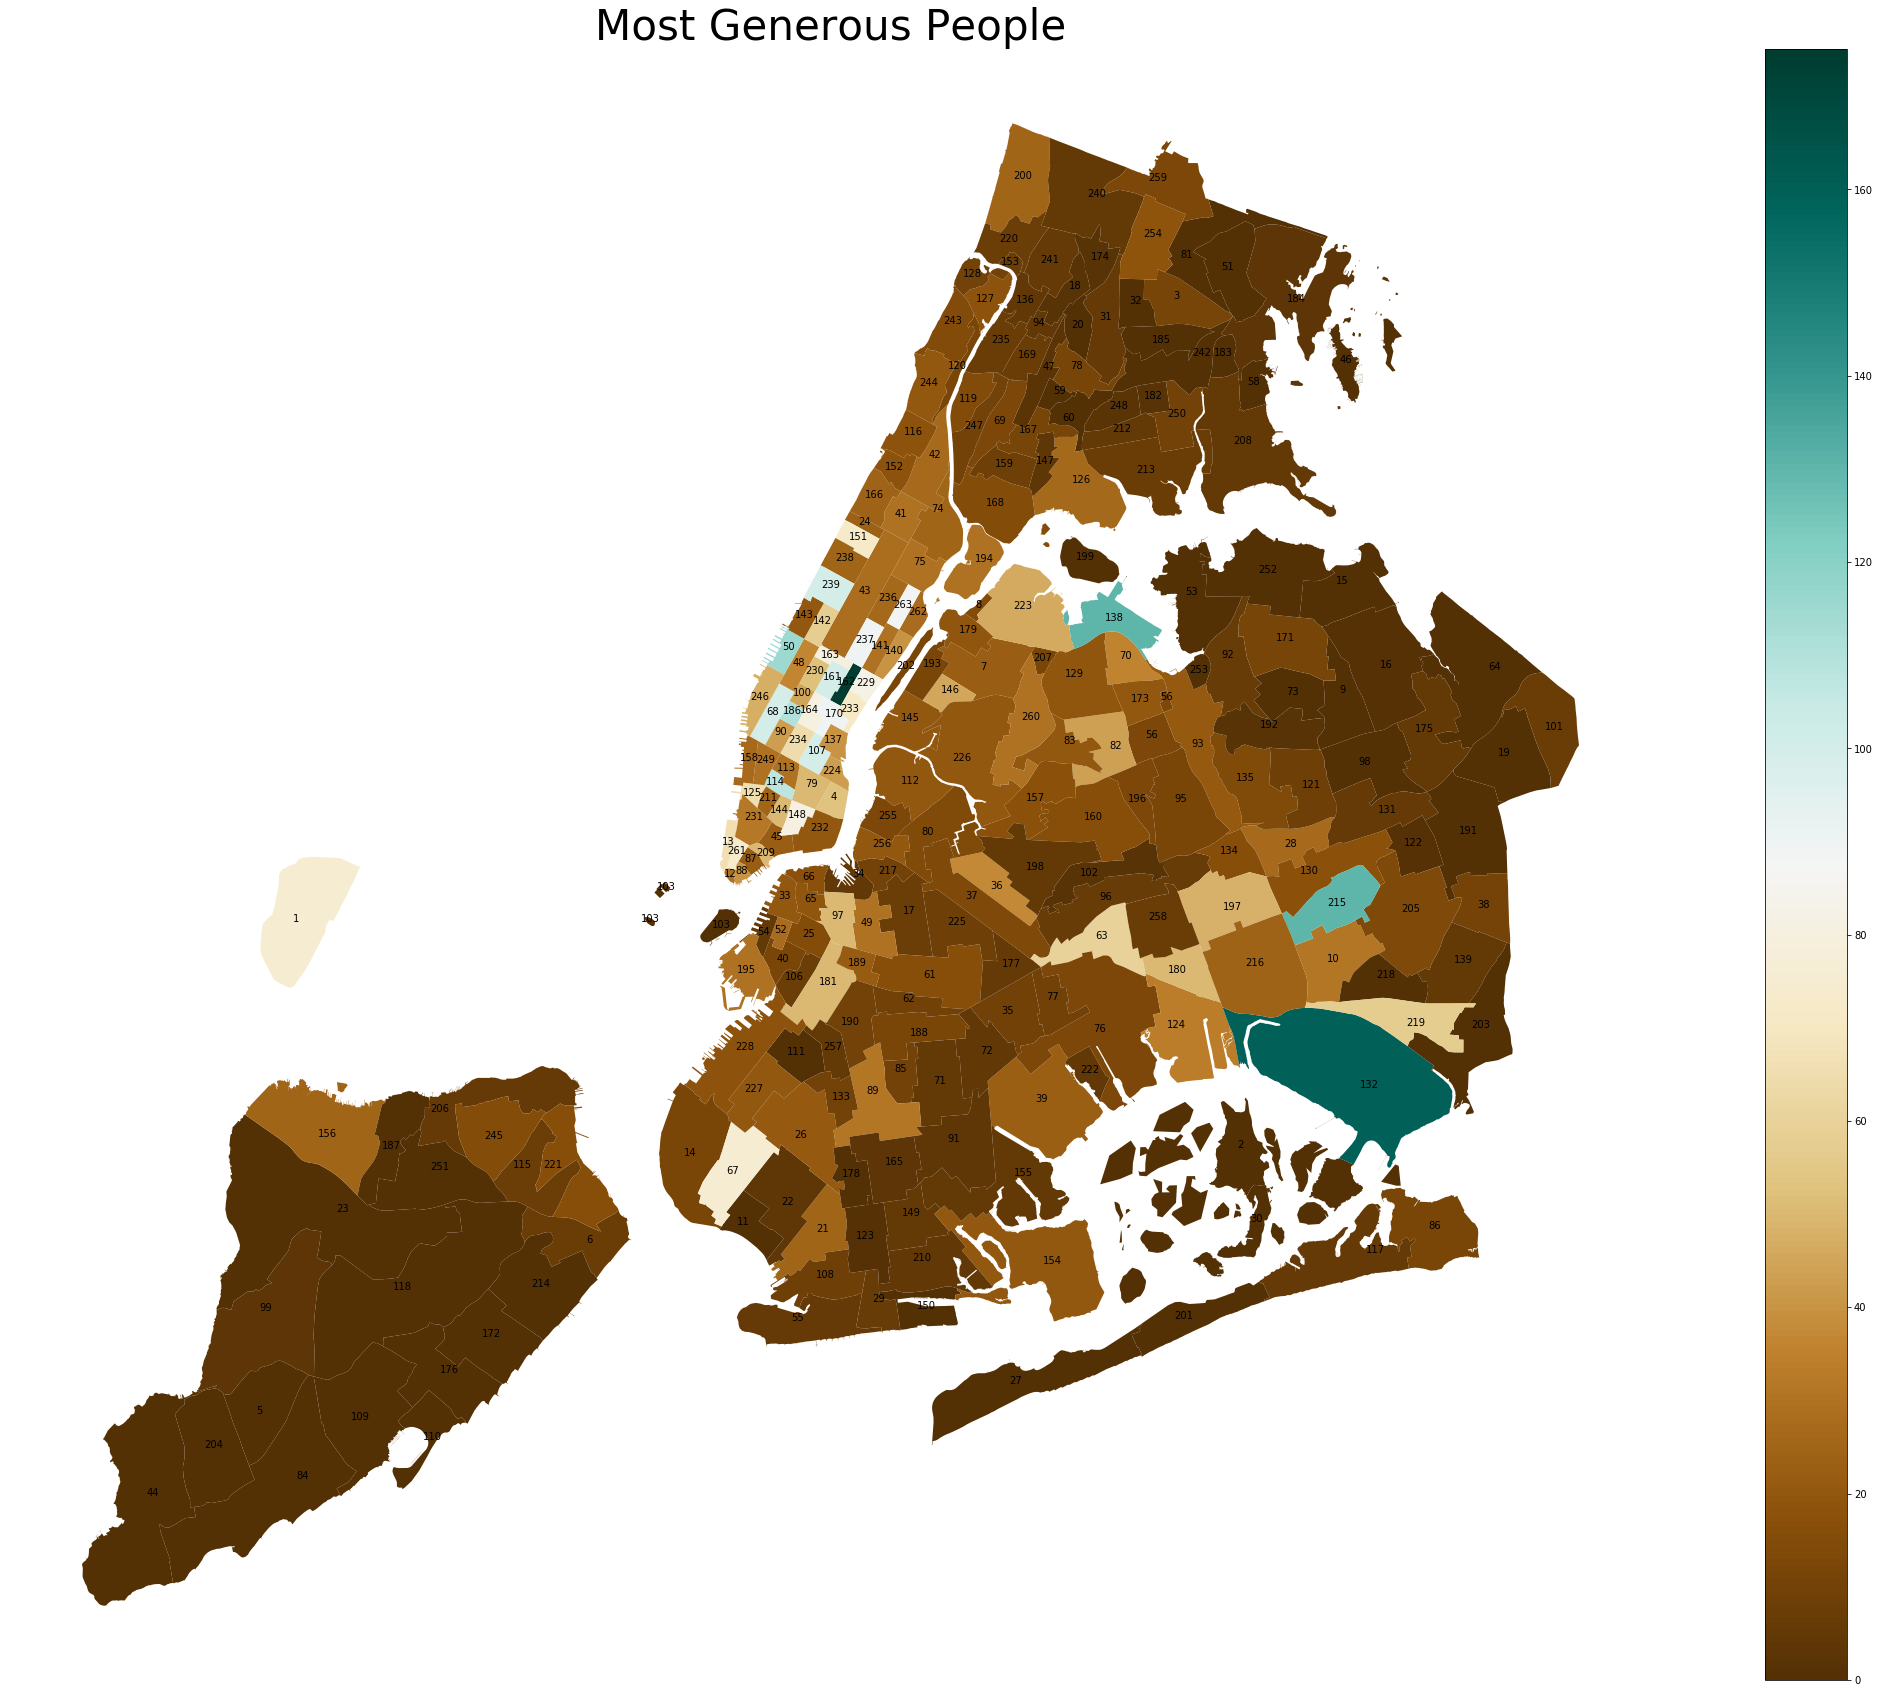

In [4]:
plt.rcParams['figure.figsize'] = [40,30]
cur.execute('''select DISTINCT MAX(tip_amount) over (partition by LocationID order by LocationID), LocationID from taxi;''')
rows = cur.fetchall()
df_geo['max_tips'] = 0
fig, ax = plt.subplots()
for row in rows:
    df_geo.loc[df_geo['LocationID'] == row[1],'max_tips'] = row[0]

plt.rcParams['figure.figsize'] = [40, 30]
df_geo['coords'] = df_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
df_geo['coords'] = [coords[0] for coords in df_geo['coords']]
for idx, row in df_geo.iterrows():
    plt.annotate(s=row['LocationID'], xy=row['coords'],
                 horizontalalignment='center')
df_geo.plot(column='max_tips', cmap='BrBG', legend=True, ax=ax)
ax.set_title("Most Generous People", fontsize=42)
ax.set_axis_off()
fig.savefig('Highest_Tips.png')
 



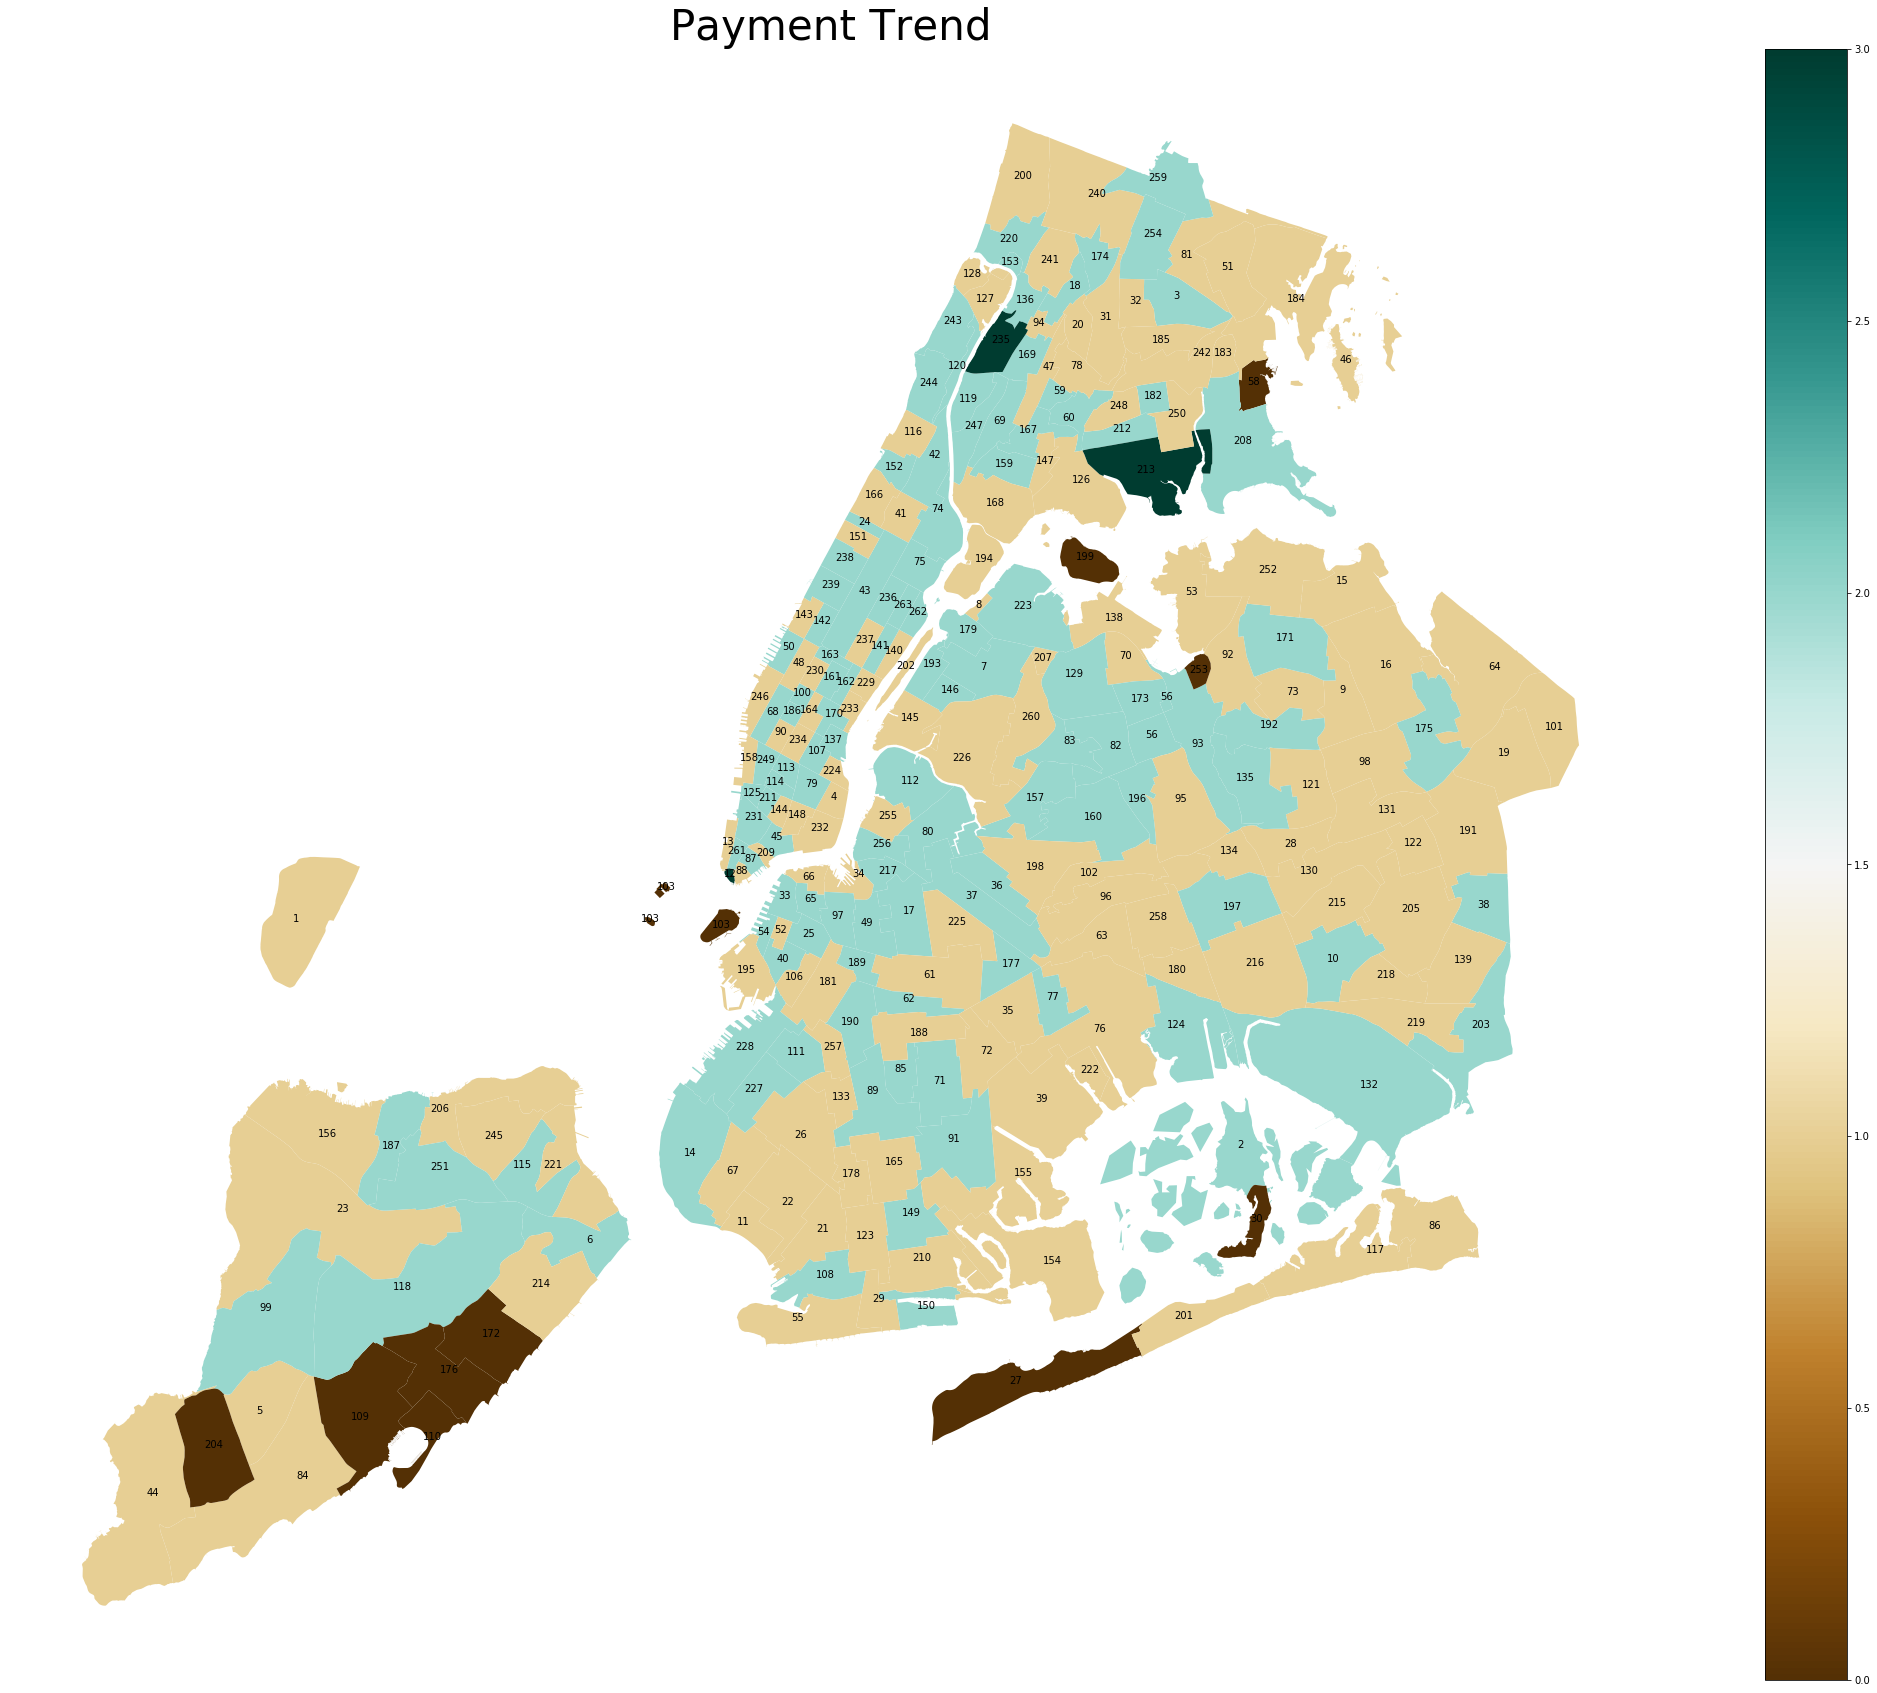

In [5]:
plt.rcParams['figure.figsize'] = [40,30]

cur.execute('''select payment_type,count(payment_type),LocationID from taxi group by LocationID order by LocationID asc;''')
rows = cur.fetchall()
df_geo['payment_mode'] = 0
fig, ax = plt.subplots()
for row in rows:
    df_geo.loc[df_geo['LocationID'] == row[2],'payment_mode'] = row[0]

plt.rcParams['figure.figsize'] = [40, 30]    
df_geo['coords'] = df_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
df_geo['coords'] = [coords[0] for coords in df_geo['coords']]
for idx, row in df_geo.iterrows():
    plt.annotate(s=row['LocationID'], xy=row['coords'],
                 horizontalalignment='center')


df_geo.plot(column='payment_mode', cmap='BrBG', legend=True, ax=ax)
ax.set_title("Payment Trend", fontsize=42)
ax.set_axis_off()
fig.savefig('Payment_Trends.png')

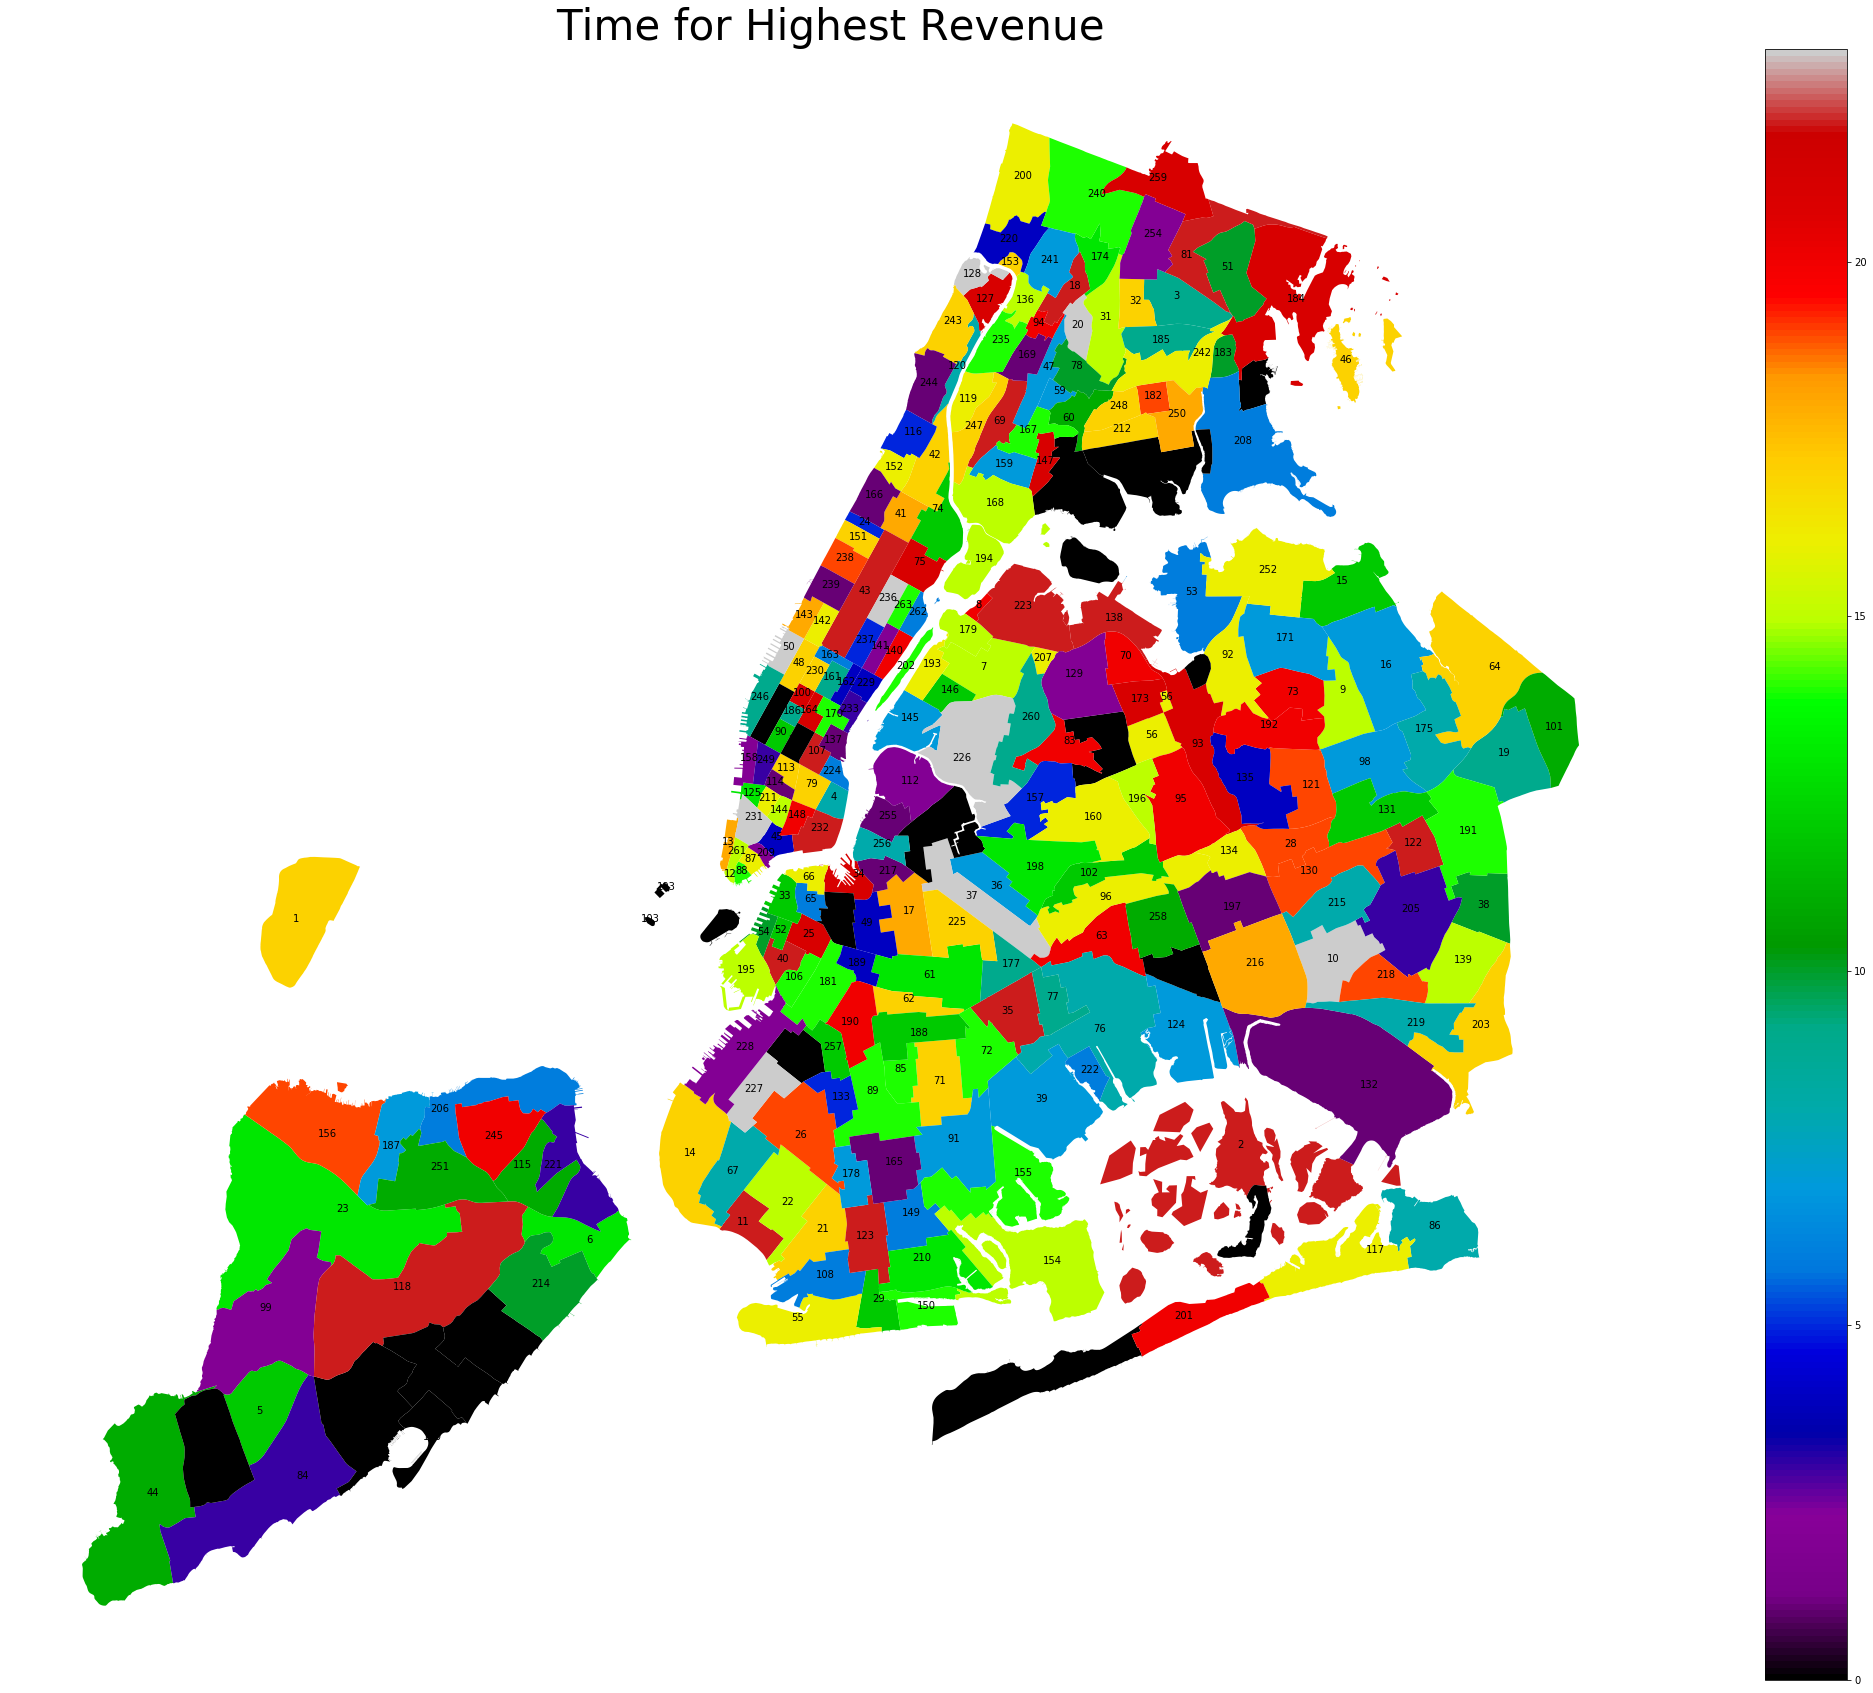

In [6]:
plt.rcParams['figure.figsize'] = [40,30]
cur.execute('''select MAX(total_amount),(select strftime('%H', pickup_datetime)),LocationID from taxi group by LocationID order by pickup_datetime asc;''')
rows = cur.fetchall()
df_geo['time_window'] = 0
fig, ax = plt.subplots()
for row in rows:
    df_geo.loc[df_geo['LocationID'] == row[2],'time_window'] = row[1]
    
plt.rcParams['figure.figsize'] = [40, 30]
df_geo['coords'] = df_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
df_geo['coords'] = [coords[0] for coords in df_geo['coords']]
for idx, row in df_geo.iterrows():
    plt.annotate(s=row['LocationID'], xy=row['coords'],
                 horizontalalignment='center')
    
df_geo['time_window'] = df_geo['time_window'].astype(int)
df_geo.plot(column='time_window', cmap='nipy_spectral', legend=True, ax=ax)
ax.set_title("Time for Highest Revenue", fontsize=42)
ax.set_axis_off()
fig.savefig('Time_for_Highest_Revenue.png')

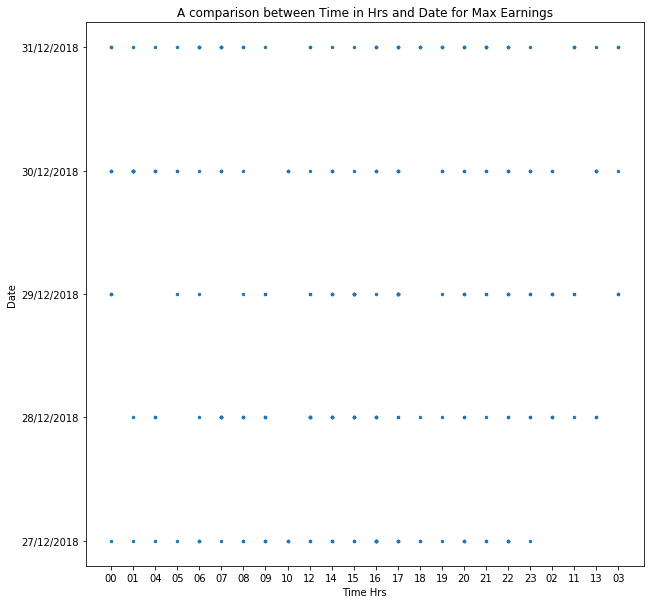

In [7]:
plt.rcParams['figure.figsize'] = [10,10]
cur.execute('''select MAX(total_amount),(select strftime('%H', pickup_datetime)),(select strftime('%d/%m/%Y', pickup_datetime)),LocationID from taxi group by LocationID order by pickup_datetime asc;''')
rows=cur.fetchall()
fig, ax = plt.subplots()
df=pd.DataFrame(rows)
df.columns=['max_total_amount','time_max','date_max','LocationID']
plt.scatter(df['time_max'],df['date_max'],s=6)
plt.title("A comparison between Time in Hrs and Date for Max Earnings")
plt.xlabel("Time Hrs")
plt.ylabel("Date")
plt.show()
fig.savefig('Highest_Revenue_Date_Time_Comparison.png')


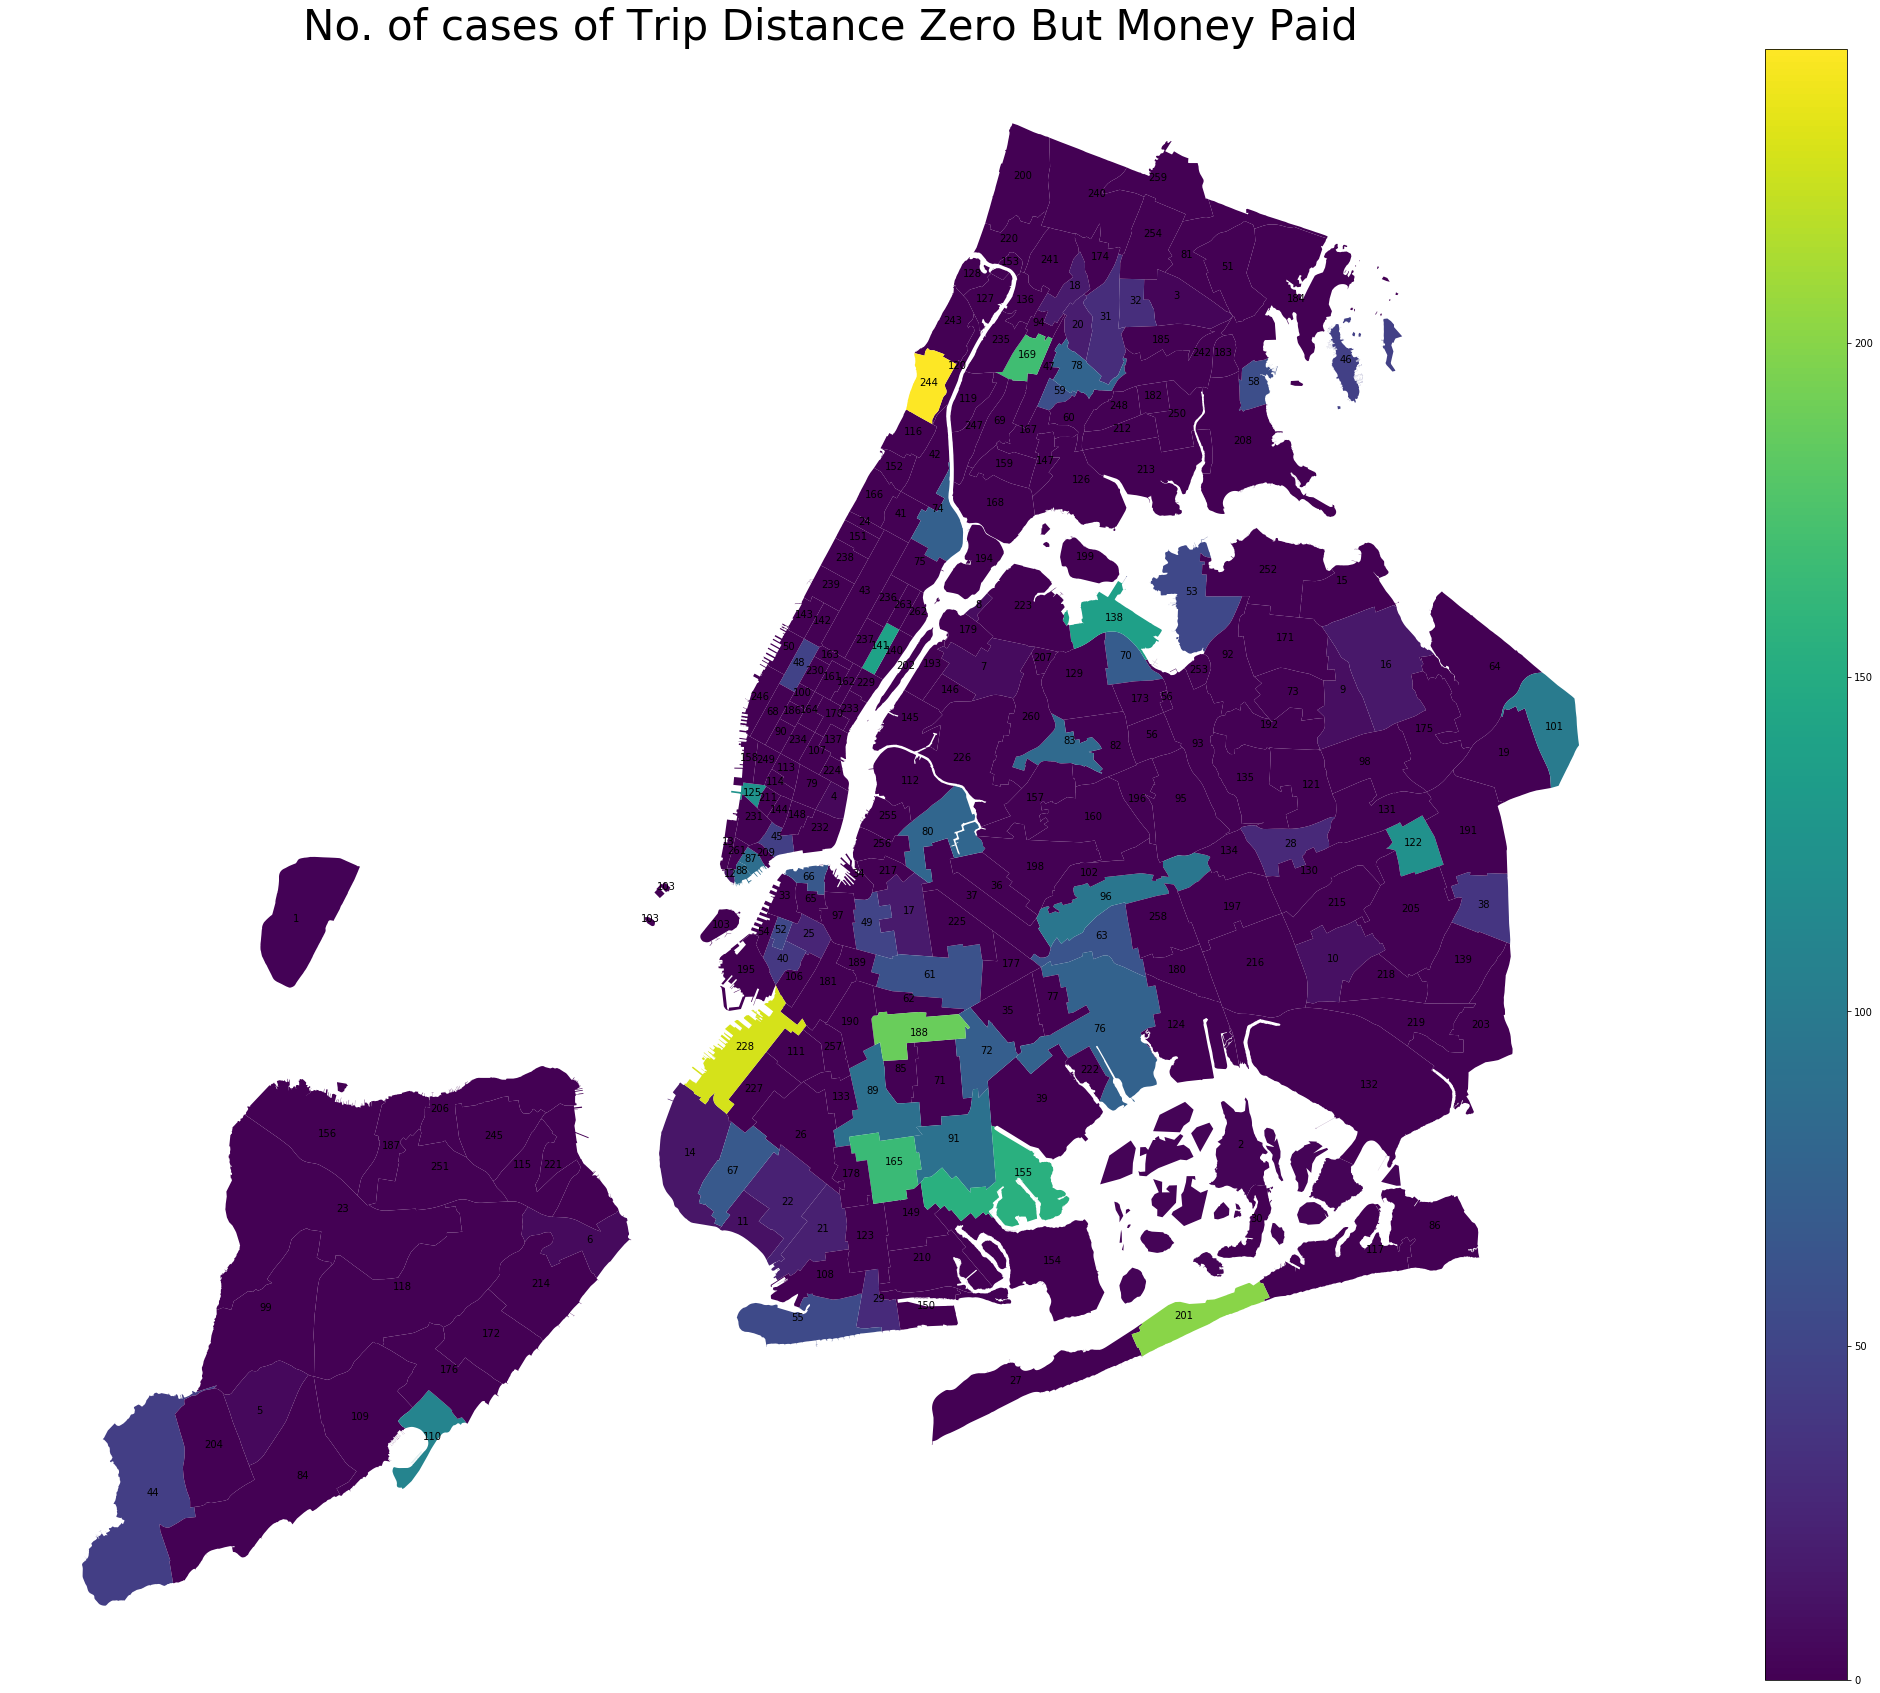

In [8]:
plt.rcParams['figure.figsize'] = [40,30]
cur.execute('''select trip_distance,count(trip_distance),LocationID,avg(total_amount) from taxi where trip_distance=0 group by LocationID order by LocationID asc;''')
rows = cur.fetchall()
df_geo['zero_trip_paid'] = 0
fig, ax = plt.subplots()
for row in rows:
    df_geo.loc[df_geo['LocationID'] == row[1],'zero_trip_paid'] = row[1]
    

plt.rcParams['figure.figsize'] = [40, 30]    
df_geo['coords'] = df_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
df_geo['coords'] = [coords[0] for coords in df_geo['coords']]
for idx, row in df_geo.iterrows():
    plt.annotate(s=row['LocationID'], xy=row['coords'],
                 horizontalalignment='center')
    
df_geo.plot(column='zero_trip_paid', cmap='viridis', legend=True, ax=ax)
ax.set_title("No. of cases of Trip Distance Zero But Money Paid", fontsize=42)
ax.set_axis_off()
fig.savefig('trip_distance_zero_money_paid.png')

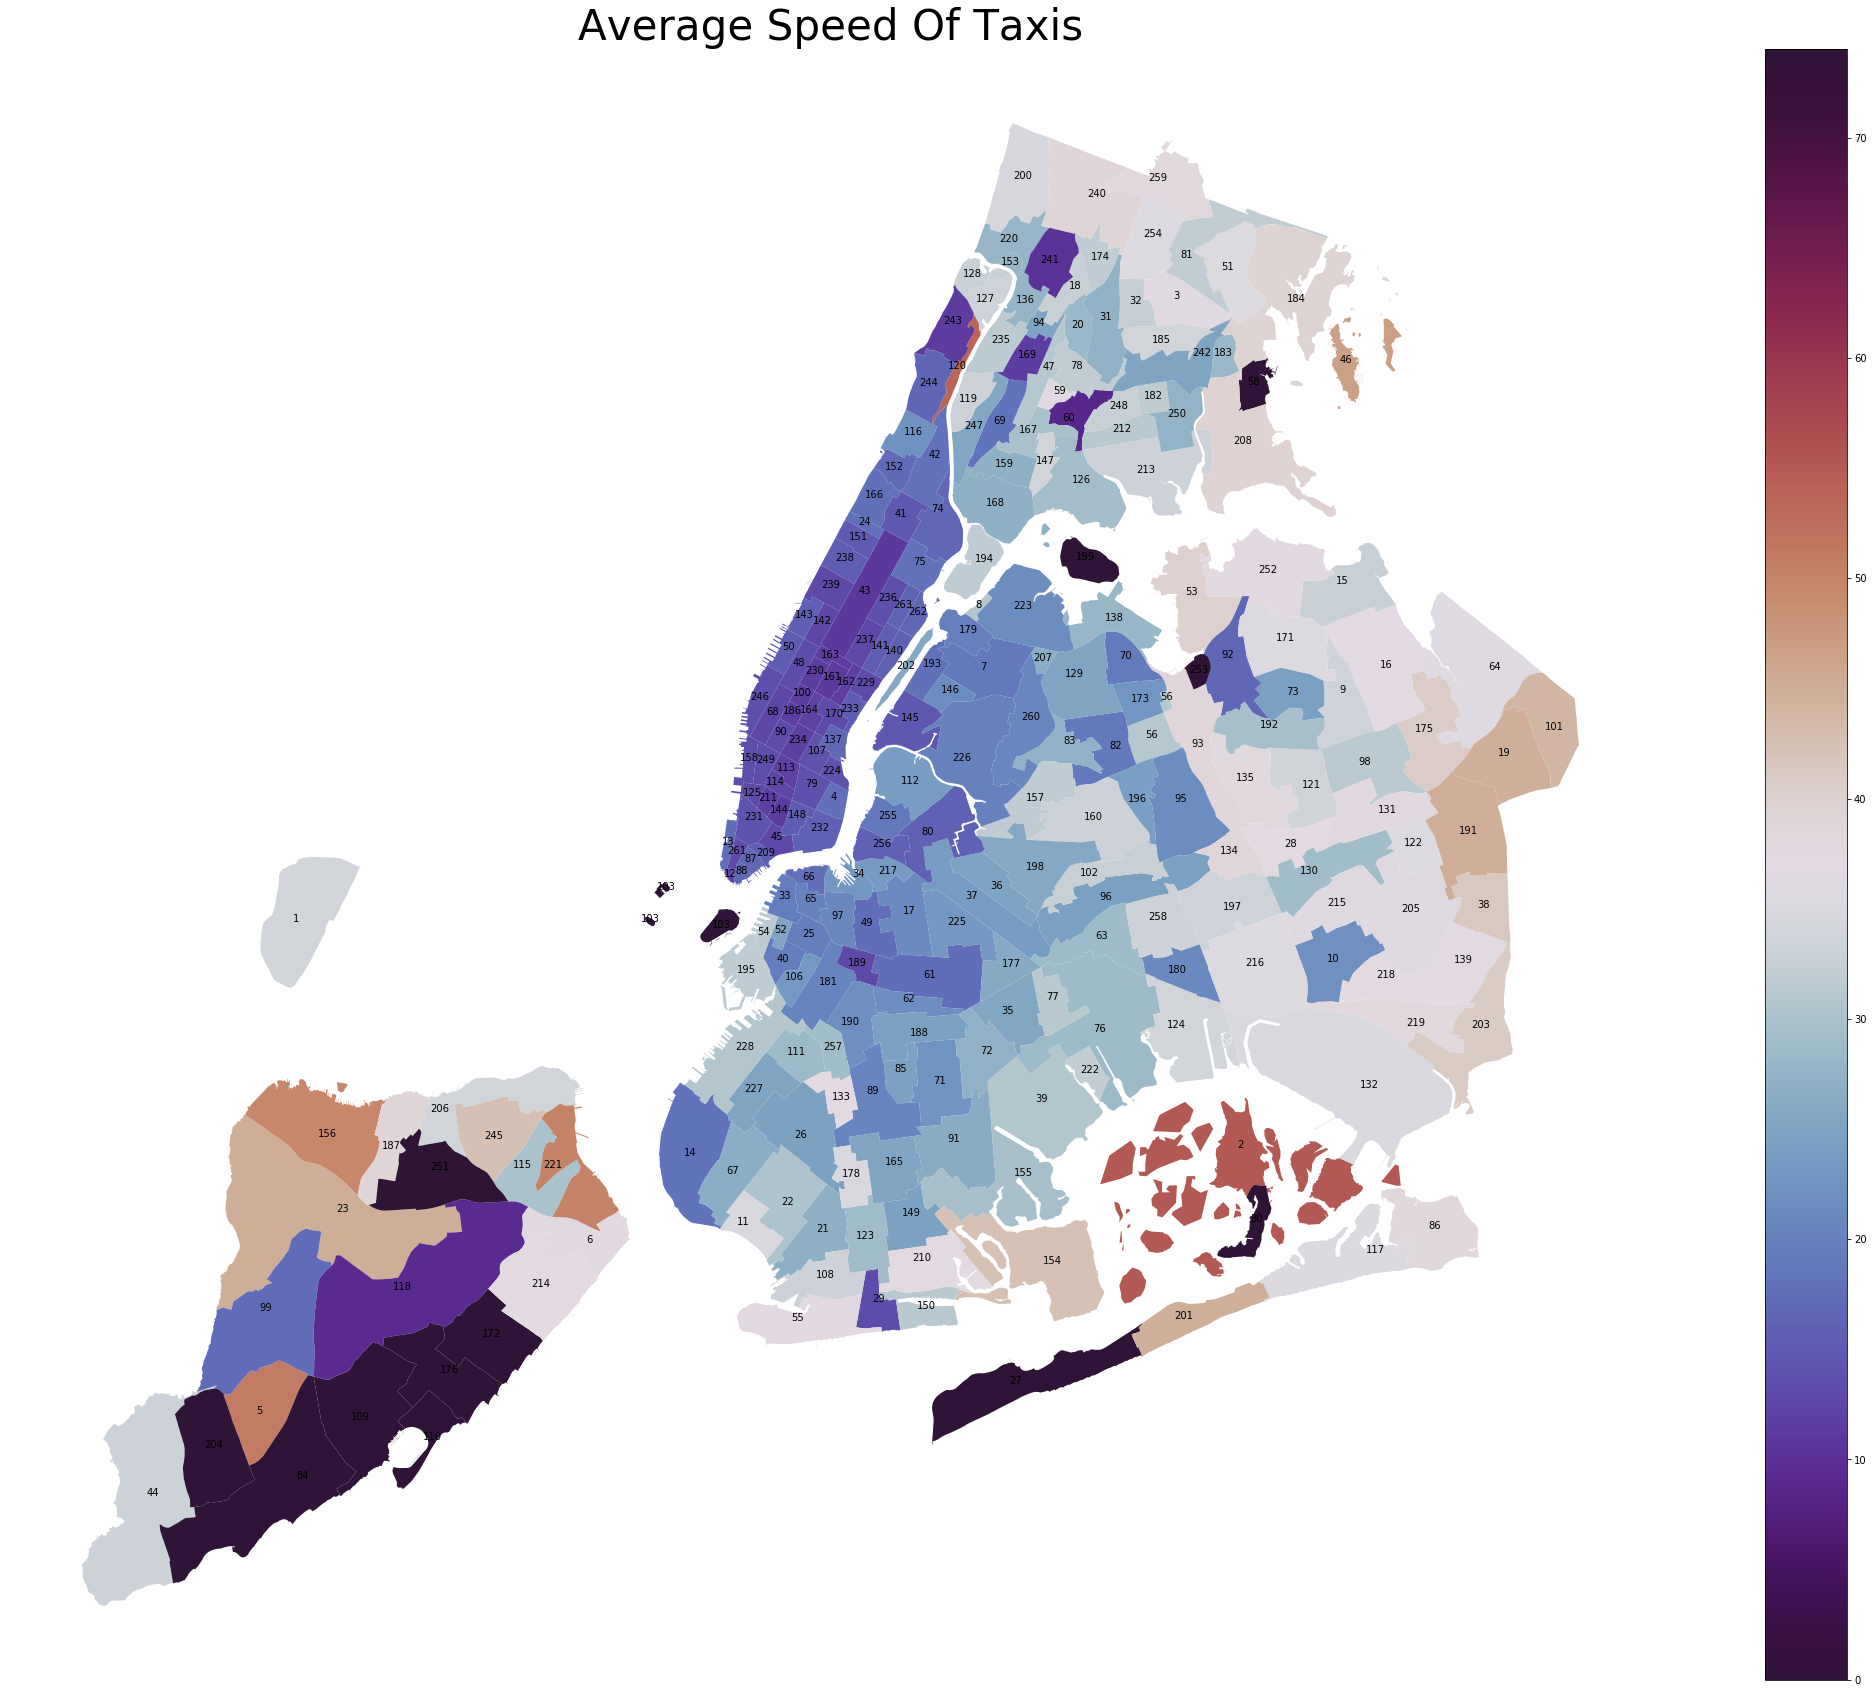

In [9]:
plt.rcParams['figure.figsize'] = [40,30]
cur.execute('''select avg_trip_distance/average_time_hrs, LocationId from taxi_norm where avg_trip_distance/average_time_hrs<100;''')

rows = cur.fetchall()

df_geo['avg_speed'] = 0

    

fig, ax = plt.subplots()
for row in rows:
    df_geo.loc[df_geo['LocationID'] == row[1],'avg_speed'] = row[0]


plt.rcParams['figure.figsize'] = [40, 30]    
df_geo['coords'] = df_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
df_geo['coords'] = [coords[0] for coords in df_geo['coords']]
for idx, row in df_geo.iterrows():
    plt.annotate(s=row['LocationID'], xy=row['coords'],
                 horizontalalignment='center')
    
df_geo.plot(column='avg_speed', cmap='twilight_shifted', legend=True, ax=ax)

ax.set_title("Average Speed Of Taxis", fontsize=42)
ax.set_axis_off()
fig.savefig('avg_speed_of_taxis.png')

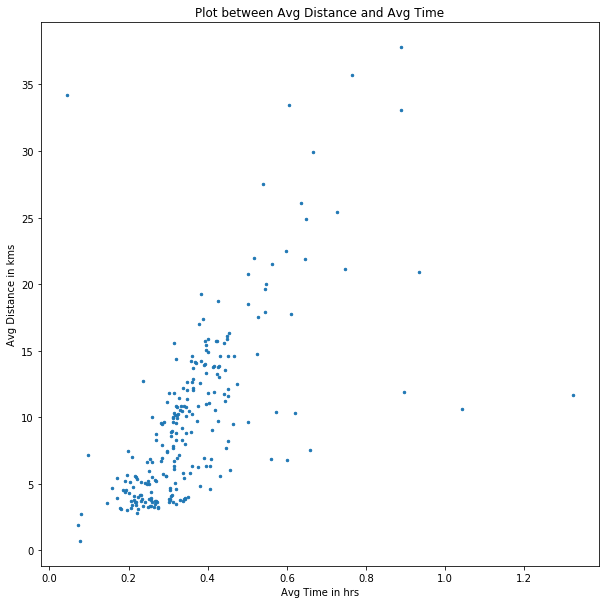

In [10]:
plt.rcParams['figure.figsize'] = [10,10]
cur.execute('''select LocationID,average_time_hrs,avg_trip_distance from taxi_norm''')
rows=cur.fetchall()
fig, ax = plt.subplots()
df=pd.DataFrame(rows)
df.columns=['LocationID','avg_time_hrs','avg_dist_kms']
plt.scatter(df['avg_time_hrs'],df['avg_dist_kms'],s=6)
plt.title("Plot between Avg Distance and Avg Time")
plt.xlabel("Avg Time in hrs")
plt.ylabel("Avg Distance in kms")
plt.show()
fig.savefig('avg_dist_and_avg_time.png')